Достанем данные из наших снимков (DWI)
Дальше попробуем их кластеризовать

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import nibabel as nib # common way of importing nibabel
from nilearn import image

In [19]:
path = r"C:/Users/Анна/Desktop/APPOPLEXY/Lesions/Lesions/"
folders = os.listdir(path)
path_to_result = f'{path}/imgs'


In [ ]:
path_to_result = f'{path}/imgs'

for folder in folders:
    surnames = os.listdir(f'{path}/{folder}')
    for pacient in surnames:
        #костыль
        # if (pacient in ['Balandin_VP',
        #                 'Belev_AS',
        #                 'Bragina_NI',
        #                 'Bruhanov_AD',
        #                 'Chikilev_SA',
        #                 'Florenko_NV',
        #                 'Godovalova_NV',
        #                 'Ilin_AS',
        #                 'Ishkov_AL',
        #                 'Kalinin_VM',
        #                 'Korotaev_SB',
        #                 'Krinitzin_AP',
        #                 'Kuznetzov_IP',
        #                 'Lunegova_GN',
        #                 'Lyubimov_YuG',
        #                 'Lyzlov_NV',
        #                 'Morozov_GM',
        #                 'Muravoyv_VZ',
        #                 'Pankova_GP',
        #                 'Pankov_MA'] 
        #     and folder == 'Aterotromb'):
        #     continue
        # else:    
            img = nib.load(f'{path}/{folder}/{pacient}/dwi.nii.gz')
            if len(img.shape) == 4:
                img_3d = image.index_img(img, 0)
                img_data = img_3d.get_fdata()
            else:
                img_data = img.get_fdata()
            for i in range(img.shape[2]):
                plt.imshow(img_data[:, :,i].T, origin='lower', cmap='gray')
                plt.axis('off')
                plt.savefig(f'{path_to_result}/{folder}_{pacient}_{i}.png',
                    format='png', bbox_inches='tight', pad_inches=0)
#работало 1530 минут (25 часов 30 минут)

In [119]:
#захэшируем все названия, чтобы спрятать имена


import hashlib as hs
os.chdir(r"C:/Users/Анна/Desktop/APPOPLEXY/Lesions/Lesions/imgs")
hash_table = open(r'C:/Users/Анна/Desktop/APPOPLEXY/Lesions/Lesions/hash_table.csv', 'w')
filenames = os.listdir(f'{path}/imgs')
print('name;filename;img_num;hash;hash_name', file=hash_table)


In [120]:
for f in filenames:
    hash = hs.sha256()
    s, ext = f.split('.')
    hash.update(bytes(s, 'utf-8'))
    new_s = hash.hexdigest()
    new_name = new_s[:10] + '.' + ext
    os.rename(f, new_name)
    print(s.split('_')[1], s, s.split('_')[-1], new_s, new_name, sep=';', file=hash_table)

hash_table.close()

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import nibabel as nib # common way of importing nibabel
from nilearn import image

In [5]:
path = r'C:/Users/Анна/Desktop/APPOPLEXY/!Test Dataset/prostate/Task05_Prostate'
img = nib.load(f'{path}/imagesTr/prostate_00.nii')
print(type(img))
print(img.shape)

<class 'nibabel.nifti1.Nifti1Image'>
(320, 320, 15, 2)


In [6]:
from nilearn import image
img_3d = image.index_img(img, 0)
print(img_3d.shape)
print(img_3d.header.get_zooms())

(320, 320, 15)
(0.6, 0.6000003, 4.0000024)


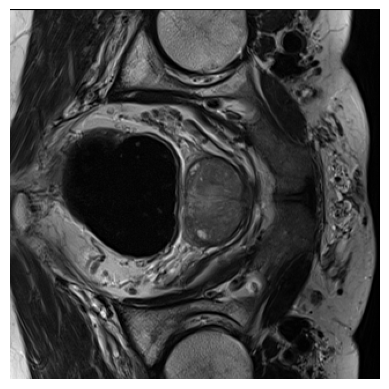

In [14]:
img_data = img_3d.get_fdata()
plt.imshow(img_data[:, :,8], origin='lower', cmap='gray')
plt.axis('off')

plt.savefig(r'C:/Users/Анна/Desktop/APPOPLEXY/Lesions/Lesions/Aterotromb/res.png',
            format='png', bbox_inches='tight', pad_inches=0)

In [12]:
img = nib.load(f'{path}/labelsTr/prostate_00.nii')
print(type(img))
print(img.shape)


<class 'nibabel.nifti1.Nifti1Image'>
(320, 320, 15)


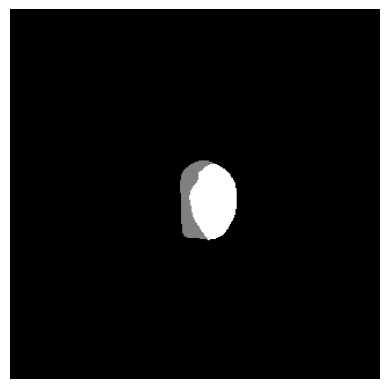

In [22]:
img_data = img.get_fdata()
plt.imshow(img_data[:, :,4], origin='lower', cmap='gray')
plt.axis('off')

plt.savefig(r'C:/Users/Анна/Desktop/APPOPLEXY/Lesions/Lesions/Aterotromb/res.png',
            format='png', bbox_inches='tight', pad_inches=0)

###  glioblastoma (GBM/HGG) and lower grade glioma (LGG)

In [3]:
path = r'C:\Users\Анна\Desktop\APPOPLEXY\!Test Dataset\Brain Tumor\MICCAI_BraTS_2019_Data_Training\LGG\BraTS19_2013_0_1'
img = nib.load(f'{path}/BraTS19_2013_0_1_t1.nii')
print(type(img))
print(img.shape)

<class 'nibabel.nifti1.Nifti1Image'>
(240, 240, 155)


(-0.5, 239.5, -0.5, 239.5)

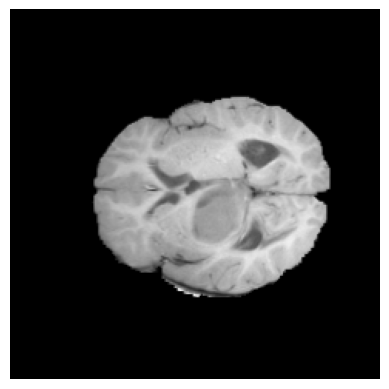

In [7]:
img_data = img.get_fdata()
plt.imshow(img_data[:, :,70], origin='lower', cmap='gray')
plt.axis('off')

#plt.savefig(r'C:/Users/Анна/Desktop/APPOPLEXY/Lesions/Lesions/Aterotromb/res.png',
            #format='png', bbox_inches='tight', pad_inches=0)

In [5]:
# Извлеките матрицу преобразования, которая преобразует координаты в миллиметры в координаты Талараха
talairach_transform = img.affine

# Выведите матрицу преобразования
print(talairach_transform)

# img.affine в библиотеке nibabel представляет собой матрицу преобразования, которая описывает связь между пиксельными координатами внутри 
# изображения и мировыми (физическими) координатами в миллиметрах. Это матрица 4x4, которая используется для преобразования координат между 
# пиксельным пространством и миллиметровым пространством.

[[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


# Оси сканера 
Начало осей находится в изоцентре магнита. Это координата (0, 0, 0) в нашем эталонном пространстве. Все три оси проходят через изоцентр.

Единицы измерения для всех трех осей — миллиметры.

Представьте себе наблюдателя, стоящего за сканером и смотрящего через отверстие магнита в конец платформы сканера. Представьте себе линию, идущую к наблюдателю через центр отверстия магнита, параллельную кровати, с нулевой точкой в ​​изоцентре магнита и положительными значениями ближе к наблюдателю. Назовите эту линию осью отверстия сканера .

Нарисуйте линию, идущую от пола комнаты сканирования вверх через изоцентр магнита к потолку под прямым углом к ​​оси отверстия сканера. 0 соответствует изоцентру, а положительные значения — к потолку. Назовите это осью сканер-пол/потолок .

Нарисуйте линию под прямым углом к ​​двум другим линиям, идущую слева от наблюдателя, параллельно полу и через изоцентр магнита справа от наблюдателя. 0 находится в изоцентре, а положительные значения находятся справа. Назовите это сканером влево/вправо .

Если мы упорядочим оси (сканер слева-справа; сканер пол-потолок; сканер отверстие), тогда мы получим упорядоченный набор из трех осей и, следовательно, определение трехмерного пространства . Назовите первую ось «X», вторую «Y» и третью «Z». Координата(x,y,z)=(10,−5,−3)
в этом пространстве относится к точке в пространстве, находящейся в 10 мм справа от изоцентра (вымышленного наблюдателя), в 5 мм от пола от изоцентра и в 3 мм от подножия кровати сканера. Это эталонное пространство иногда называют «сканером XYZ». Это было стандартное эталонное пространство для предшественника DICOM, называемое ACR/NEMA 2.0.

In [9]:
# Извлеките данные изображения
data = img.get_fdata()

# Выберите номер среза (например, 0 для первого среза)
slice_number = 0

# Извлеките миллиметровые координаты среза
slice_coordinates = img.affine.dot([0, 0, slice_number, 1])[:3]

# slice_coordinates будет содержать миллиметровые координаты среза
print(slice_coordinates)

for slice in range(155):
    slice_coordinates = img.affine.dot([0, 0, slice, 1])[:3]
    print(slice_coordinates)

[  0. 239.   0.]
[  0. 239.   0.]
[  0. 239.   1.]
[  0. 239.   2.]
[  0. 239.   3.]
[  0. 239.   4.]
[  0. 239.   5.]
[  0. 239.   6.]
[  0. 239.   7.]
[  0. 239.   8.]
[  0. 239.   9.]
[  0. 239.  10.]
[  0. 239.  11.]
[  0. 239.  12.]
[  0. 239.  13.]
[  0. 239.  14.]
[  0. 239.  15.]
[  0. 239.  16.]
[  0. 239.  17.]
[  0. 239.  18.]
[  0. 239.  19.]
[  0. 239.  20.]
[  0. 239.  21.]
[  0. 239.  22.]
[  0. 239.  23.]
[  0. 239.  24.]
[  0. 239.  25.]
[  0. 239.  26.]
[  0. 239.  27.]
[  0. 239.  28.]
[  0. 239.  29.]
[  0. 239.  30.]
[  0. 239.  31.]
[  0. 239.  32.]
[  0. 239.  33.]
[  0. 239.  34.]
[  0. 239.  35.]
[  0. 239.  36.]
[  0. 239.  37.]
[  0. 239.  38.]
[  0. 239.  39.]
[  0. 239.  40.]
[  0. 239.  41.]
[  0. 239.  42.]
[  0. 239.  43.]
[  0. 239.  44.]
[  0. 239.  45.]
[  0. 239.  46.]
[  0. 239.  47.]
[  0. 239.  48.]
[  0. 239.  49.]
[  0. 239.  50.]
[  0. 239.  51.]
[  0. 239.  52.]
[  0. 239.  53.]
[  0. 239.  54.]
[  0. 239.  55.]
[  0. 239.  56.]
[  0. 239.  57

In [55]:
img = nib.load(f'{path}/BraTS19_2013_0_1_seg.nii')

print(type(img))
print(img.shape)


<class 'nibabel.nifti1.Nifti1Image'>
(240, 240, 155)


In [59]:
data = img.get_fdata()
new_data = data.copy()
new_data[new_data > 1] = 1

In [60]:
clipped_img = nib.Nifti1Image(new_data, img.affine, img.header)

(-0.5, 239.5, -0.5, 239.5)

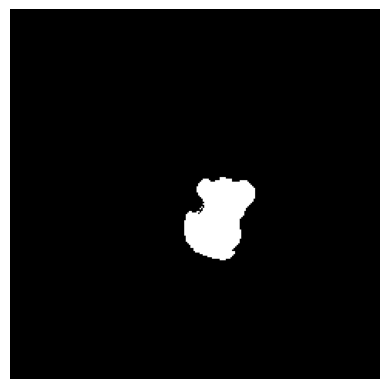

In [66]:
img_data = clipped_img.get_fdata()
plt.imshow(img_data[:, :,55], origin='lower', cmap='gray')
plt.axis('off')

#plt.savefig(r'C:/Users/Анна/Desktop/APPOPLEXY/Lesions/Lesions/Aterotromb/res.png',
            #format='png', bbox_inches='tight', pad_inches=0)